In [51]:
import feos
import si_units as si
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [88]:
thijs = dict(
    sigma=2.7362991828156673,
    epsilon_k=5.390493085958323,
    rep=9.008494804971958,
    att=6.0,
)

ailo = dict(sigma=2.7443, epsilon_k=5.4195, rep=9, att=6, c_sigma=[1.0]*3, c_epsilon_k=[1.0]*3, c_rep=[1.0]*5)
vrqmie_ailo = dict(m=1.0, sigma=2.7443, epsilon_k=5.4195, lr=9, la=6, fh=1)

In [89]:
vrq_pr = feos.PureRecord(identifier=feos.Identifier("helium"), molarweight=4.002602, **vrqmie_ailo)
pr = feos.PureRecord(identifier=feos.Identifier("helium"), molarweight=4.002602, **ailo)

In [90]:
cs_model = feos.EquationOfState.uvcs(feos.Parameters.new_pure(pr))
vrq_model = feos.EquationOfState.saftvrqmie(feos.Parameters.new_pure(vrq_pr))

In [91]:
%%time
df_cs = feos.PhaseDiagram.pure(cs_model, min_temperature=2*si.KELVIN, npoints=250).to_dict(feos.Contributions.Residual)

CPU times: user 27.9 ms, sys: 1.31 ms, total: 29.3 ms
Wall time: 31.6 ms


In [92]:
%%time
df_vrq = feos.PhaseDiagram.pure(vrqmie_model, min_temperature=2*si.KELVIN, npoints=250).to_dict(feos.Contributions.Residual)

CPU times: user 113 ms, sys: 1.46 ms, total: 114 ms
Wall time: 115 ms


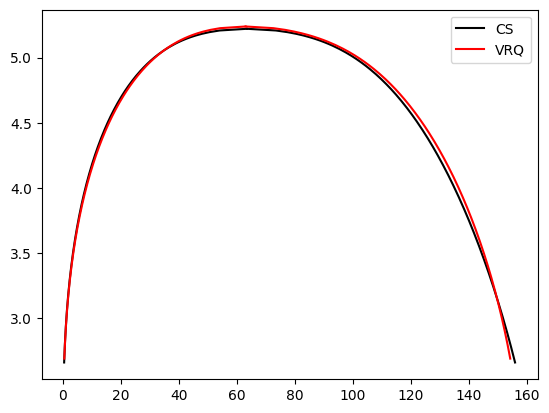

In [93]:
plt.plot(df_cs["mass density liquid"], df_cs["temperature"], 'k', label="CS")
plt.plot(df_cs["mass density vapor"], df_cs["temperature"], 'k')
plt.plot(df_vrq["mass density liquid"], df_vrq["temperature"], 'r', label="VRQ")
plt.plot(df_vrq["mass density vapor"], df_vrq["temperature"], 'r')
plt.legend();